# 最適化アルゴリズムの比較
このノートではニューラルネットワークの最適化アルゴリズムの比較を行う. データセットは`fashion_mnist`を用いる.


Fashion MNIST https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data?hl=ja

28x28の画像データで次の10種類の衣類のいずれかに分類される. 訓練データは60000件, テストデータは10000件ある.

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

比較するアルゴリズムは次の5つである.
1. SGD
2. RMSprop
3. Adagrad
4. Adadelta
5. Adam

In [1]:
# データのロード
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [2]:
# データセットの大きさ確認
print(x_train.shape) # 訓練データのサイズ
print(x_test.shape) # テストデータのサイズ

(60000, 28, 28)
(10000, 28, 28)


In [9]:
# データの整形
from tensorflow.keras.utils import to_categorical

# (28,28)を(1,784)に変換して色を(0~255)から(0～1)にscaling
x_train = x_train.reshape(-1, 784) / 255
x_test = x_test.reshape(-1, 784) /255
#(0~9)のラベルをone-hot encordinh
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
# モデル構築
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

def set_model(optimizer):
    """最適化アルゴリズムの違うモデルを生成する関数
    
    Args:
    optimizaer(str) : 最適化アルゴリズム名
    
    Returns:
    model : 生成したモデル
    """
    # モデルの容器を作成
    model = Sequential()
    # layerを設定
    model.add(Dense(512, input_shape=(784,), activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(10, activation='softmax'))
    # 損失関数, 最適化手法, 評価関数を設定
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [11]:
# すべての初期値で実行
sgd_model = set_model("SGD")
rms_model = set_model("RMSprop")
adagrad_model = set_model("AdaGrad")
adadelta_model = set_model("Adadelta")
adam_model = set_model("Adam")

In [27]:
# 学習
from tensorflow.keras.callbacks import EarlyStopping

# patience 指定したepoch数改善がないと訓練を停止する.
early_stopping = EarlyStopping(patience=10, verbose=1)

sgd_history = sgd_model.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=30, validation_data=(x_test, y_test), callbacks=[early_stopping])
rms_history = rms_model.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=30, validation_data=(x_test, y_test), callbacks=[early_stopping])
adagrad_history = adagrad_model.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=30, validation_data=(x_test, y_test), callbacks=[early_stopping])
adadelta_history = adadelta_model.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=30, validation_data=(x_test, y_test), callbacks=[early_stopping])
adam_history = adam_model.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=30, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/30
60/60 - 0s - loss: 0.5305 - accuracy: 0.8181 - val_loss: 0.4905 - val_accuracy: 0.8312
Epoch 2/30
60/60 - 0s - loss: 0.5204 - accuracy: 0.8219 - val_loss: 0.4844 - val_accuracy: 0.8322
Epoch 3/30
60/60 - 0s - loss: 0.5130 - accuracy: 0.8228 - val_loss: 0.4783 - val_accuracy: 0.8341
Epoch 4/30
60/60 - 0s - loss: 0.5084 - accuracy: 0.8260 - val_loss: 0.4773 - val_accuracy: 0.8346
Epoch 5/30
60/60 - 0s - loss: 0.5007 - accuracy: 0.8262 - val_loss: 0.4705 - val_accuracy: 0.8379
Epoch 6/30
60/60 - 0s - loss: 0.4941 - accuracy: 0.8289 - val_loss: 0.4670 - val_accuracy: 0.8363
Epoch 7/30
60/60 - 0s - loss: 0.4905 - accuracy: 0.8303 - val_loss: 0.4636 - val_accuracy: 0.8376
Epoch 8/30
60/60 - 0s - loss: 0.4850 - accuracy: 0.8327 - val_loss: 0.4598 - val_accuracy: 0.8390
Epoch 9/30
60/60 - 0s - loss: 0.4814 - accuracy: 0.8339 - val_loss: 0.4540 - val_accuracy: 0.8402
Epoch 10/30
60/60 - 0s - loss: 0.4760 - accuracy: 0.8354 - val_loss: 0.4531 - val_accuracy: 0.8387
Epoch 11/30
60/60 -

Epoch 7/30
60/60 - 0s - loss: 1.6178 - accuracy: 0.4624 - val_loss: 1.4713 - val_accuracy: 0.5742
Epoch 8/30
60/60 - 0s - loss: 1.5920 - accuracy: 0.4720 - val_loss: 1.4434 - val_accuracy: 0.5838
Epoch 9/30
60/60 - 0s - loss: 1.5681 - accuracy: 0.4820 - val_loss: 1.4161 - val_accuracy: 0.5939
Epoch 10/30
60/60 - 0s - loss: 1.5431 - accuracy: 0.4922 - val_loss: 1.3895 - val_accuracy: 0.6004
Epoch 11/30
60/60 - 0s - loss: 1.5147 - accuracy: 0.5038 - val_loss: 1.3632 - val_accuracy: 0.6077
Epoch 12/30
60/60 - 0s - loss: 1.4937 - accuracy: 0.5130 - val_loss: 1.3375 - val_accuracy: 0.6140
Epoch 13/30
60/60 - 0s - loss: 1.4707 - accuracy: 0.5220 - val_loss: 1.3126 - val_accuracy: 0.6211
Epoch 14/30
60/60 - 0s - loss: 1.4477 - accuracy: 0.5293 - val_loss: 1.2887 - val_accuracy: 0.6280
Epoch 15/30
60/60 - 0s - loss: 1.4271 - accuracy: 0.5391 - val_loss: 1.2657 - val_accuracy: 0.6358
Epoch 16/30
60/60 - 0s - loss: 1.4040 - accuracy: 0.5480 - val_loss: 1.2433 - val_accuracy: 0.6436
Epoch 17/30
6

In [16]:
def calc_score(model):
    """テストセットの正解率と損失関数を表示する関数
    
    Args:
    model : 正解率と損失関数を計算するモデル
    
    Returns:
    None
    """
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

In [28]:
# テストセットの正解率と損失関数を表示
print("SGD")
calc_score(sgd_model)
print("RMSprop")
calc_score(rms_model)
print("Adagrad")
calc_score(adagrad_model)
print("AdaDelta")
calc_score(adadelta_model)
print("Adam")
calc_score(adam_model)

SGD
Test loss: 0.4131484925746918
Test accuracy: 0.8515999913215637
RMSprop
Test loss: 0.4193887710571289
Test accuracy: 0.8834999799728394
Adagrad
Test loss: 0.5719289183616638
Test accuracy: 0.8072999715805054
AdaDelta
Test loss: 1.0153038501739502
Test accuracy: 0.6980999708175659
Adam
Test loss: 0.35262855887413025
Test accuracy: 0.901199996471405


In [30]:
def plot_loss(history):
    """エポックごとの損失関数をプロットする関数
    
    Args:
    history : fittingの履歴
    
    Returns:
    None
    """
    # 損失関数の履歴を取得
    loss_train = history.history["loss"]
    loss_val = history.history["val_loss"]

    # 損失関数をプロット
    epochs=range(1,len(history.history["loss"])+1)
    plt.figure(facecolor="white")
    plt.plot(epochs,loss_train,label="Training loss")
    plt.plot(epochs,loss_val,label="Validation loss")
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

SGD


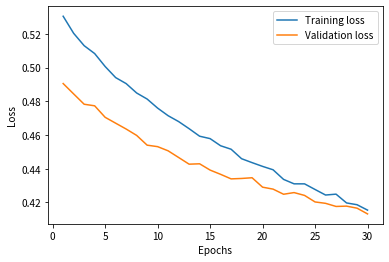

RMSprop


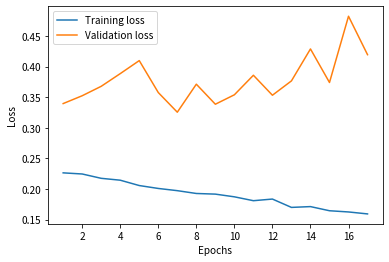

Adagrad


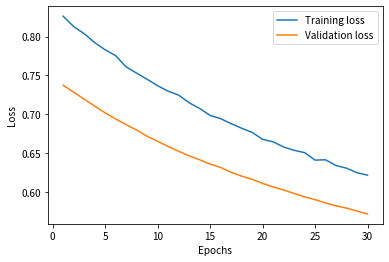

AdaDelta


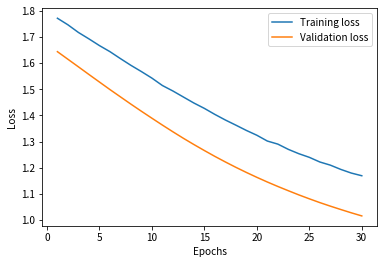

Adam


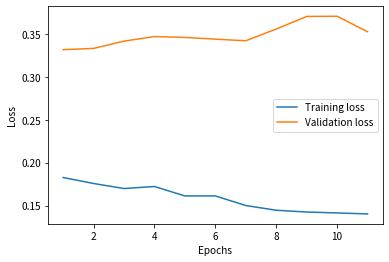

In [31]:
print("SGD")
plot_loss(sgd_history)
print("RMSprop")
plot_loss(rms_history)
print("Adagrad")
plot_loss(adagrad_history)
print("AdaDelta")
plot_loss(adadelta_history)
print("Adam")
plot_loss(adam_history)

In [34]:
def plot_acc(history):
    """エポックごとの正解率をプロットする関数
    
    Args:
    history : fittingの履歴
    
    Returns:
    None
    """
    acc_train = history.history['accuracy']
    acc_val = history.history['val_accuracy']
    epochs = range(1,len(history.history["accuracy"])+1)
    plt.figure(facecolor="white")
    plt.plot(epochs, acc_train, 'g', label='Training accuracy')
    plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

SGD


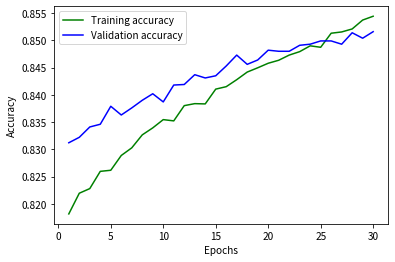

RMSprop


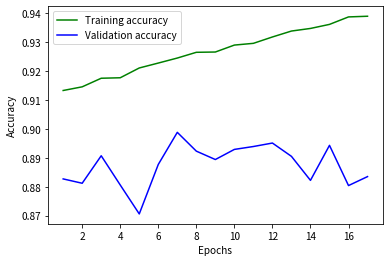

Adagrad


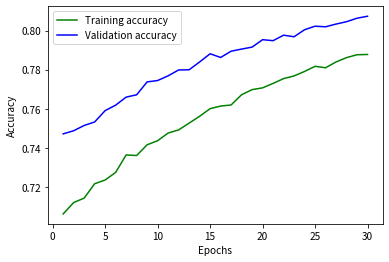

AdaDelta


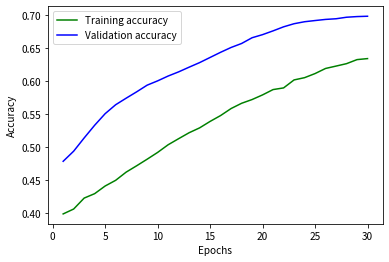

Adam


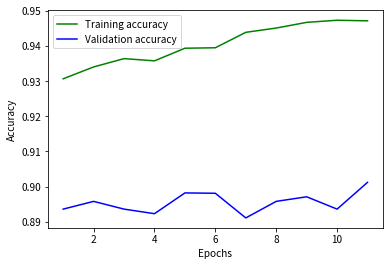

In [35]:
print("SGD")
plot_acc(sgd_history)
print("RMSprop")
plot_acc(rms_history)
print("Adagrad")
plot_acc(adagrad_history)
print("AdaDelta")
plot_acc(adadelta_history)
print("Adam")
plot_acc(adam_history)